In [376]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanicdataset-traincsv/train.csv


In [377]:
#Listing files in directory
os.listdir('/kaggle/input/titanicdataset-traincsv')

['train.csv']

In [378]:
#Reading data from source and checking whether it is imported correctly or not
Titanic_data = pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv')
Titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [379]:
#checking dimensions of data
Titanic_data.shape

(891, 12)

In [380]:
#Checking datatypes of data
Titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [381]:
# check information about data
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [382]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [383]:
# Checking categorical values in data
Categorical = Titanic_data.dtypes[Titanic_data.dtypes == "object"].index
print(Categorical)
Titanic_data[Categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Variable description**

**PassengerId** : Unique Id for every passenger, 
**Survived** : People who survived denoted as 1 and not survived as 0, 
**Pclass** : Class passenger is travelling in, 
**Name** : Full name of the passenger, 
**Sex** : Gender of the passenger, 
**Age** : Age of the passenger, 
**Sibsp** : Siblings/Spouses aboard, 
**Parch** : Parents/children aboard, 
**Ticket** : Ticket number of passenger, 
**Fare** : Ticket Fare, 
**Cabin** : Cabin passenger travelling in, 
**Embarked** : Port to embarkation. 

Now our task here is to check how many people survived and their names and how many families died. So, for that we have to check whether we need all the above columns or not and what more are required.
For suppose above we can see name and passenger Id both are unique identifiers as we need name to identify person we can delete passenger Id.

In [384]:
# Starting with columns to be removed
# Remove Passenger Id Column
del Titanic_data["PassengerId"]


In [385]:
# Checking whether Ticket Number column is useful or not
Titanic_data["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [386]:
# Removing Ticket Number Column because it also has unique values almost and not useful in grouping
del Titanic_data["Ticket"]

In [387]:
# Transforming data in to easily readable format
#Transforming survived column where 0 is denoted as dead and 1 is denoted as alive
new_survived = pd.Categorical(Titanic_data["Survived"])
new_survived = new_survived.rename_categories(["Dead", "Alive"])
new_survived.describe()

,counts,freqs
categories,,
Dead,549,0.616162
Alive,342,0.383838


In [388]:
Titanic_data["Survived"] = new_survived

In [389]:
# Here We are transforming Pclass because normally class is a category where passengers are divided in to but here it is denoted as integer.
# so , we are Tranforming data in to more understandable way.
new_Pclass = pd.Categorical(Titanic_data["Pclass"],ordered=True)
new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [390]:
# Now we are integrating newly created pclass with original data
Titanic_data["Pclass"] = new_Pclass

In [391]:
type_cabin = Titanic_data["Cabin"].astype(str) # Convert data to str
new_cabin = np.array([cabin[0] for cabin in type_cabin]) # Take first letter
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()


,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [392]:
Titanic_data["Cabin"] = new_cabin

In [393]:
# Checking data after transformations
Titanic_data.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Dead,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,Alive,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,Alive,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,Alive,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,Dead,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S
5,Dead,Class3,"Moran, Mr. James",male,NaN,0,0,8.4583,n,Q


In [394]:
#Checking null values in each column of data
Titanic_data.isnull().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [395]:
#Checking null values in age column of data, we already know there are 177 from above just checking where.
AgeNA = np.where(Titanic_data["Age"].isnull() == True)
AgeNA

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

# If there are missing values 

We can replace them with 0. 
Replace them with mean or median. 
Impute some other value. 
Split data in to two parts one with fully available and other with missing values.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

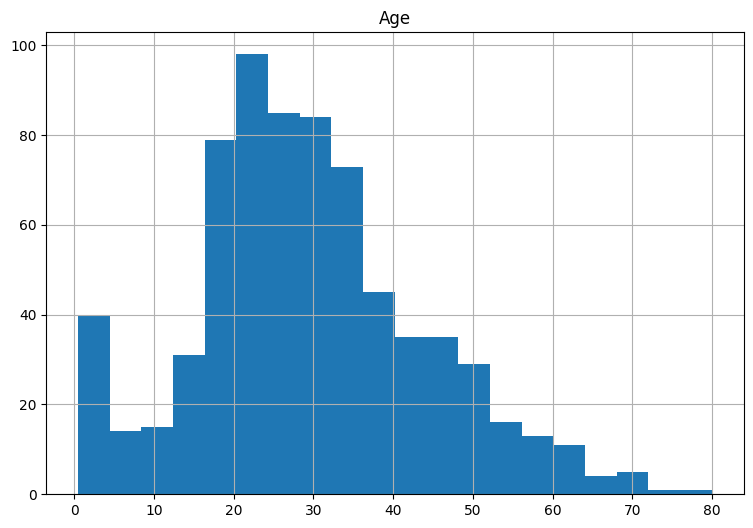

In [396]:
# As persons age cannot be 0 let us replace with some central values like mean or median
# To check mean or median let us plot histogram to visualize
Titanic_data.hist(column = 'Age', # column to plot
                 figsize = (9,6), # size of plot
                 bins = 20) # number of bins

In [397]:
Titanic_data["Age"].median()

28.0

From Histogram we can see more passengers have thier age between 20-35, To exactly estimate value to include in missing rows I have checked median value and it is 28, Now including this 28 in the place of missing values in age column.


In [398]:
new_age = np.where(Titanic_data["Age"].isnull(),28,Titanic_data["Age"])
Titanic_data["Age"] = new_age
Titanic_data["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [399]:
# Checking passengers who paid highest fare to understand use of max function
Titanic_data[Titanic_data["Fare"] == Titanic_data["Fare"].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,Alive,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,n,C
679,Alive,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B,C
737,Alive,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B,C


As we already know Sibsp column refers siblings and parch column refere parents and chilren. So, we can know how many family members are onboard for a person by merging mentioned columns and input them in new column.

In [400]:
Titanic_data["Family"] = Titanic_data["SibSp"] + Titanic_data["Parch"]

In [401]:
#To find out who has highest family members onboard
Family_onboard = np.where(Titanic_data["Family"] == max(Titanic_data["Family"]))
Titanic_data.loc[Family_onboard]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
159,Dead,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,n,S,10
180,Dead,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,n,S,10
201,Dead,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,n,S,10
324,Dead,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,n,S,10
792,Dead,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,n,S,10
846,Dead,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,n,S,10
863,Dead,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,n,S,10


In [402]:
# Below is the visualization of number of people survived by class
Titanic_data.groupby("Pclass", observed=False)


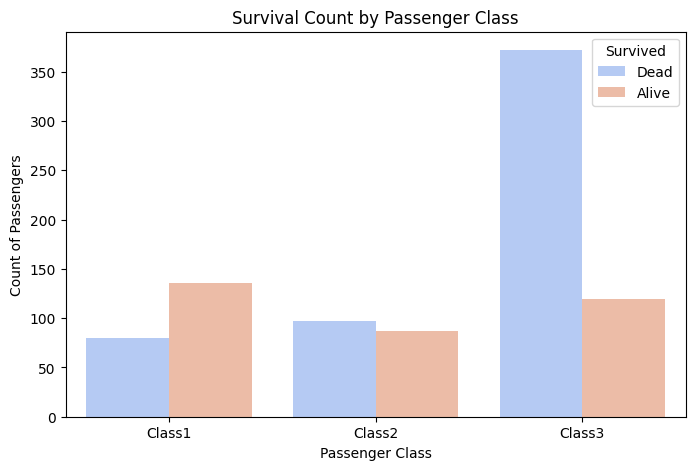

In [403]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Titanic_data already exists
plt.figure(figsize=(8, 5))
sns.countplot(data=Titanic_data, x="Pclass", hue="Survived", palette="coolwarm")

# Labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")
plt.title("Survival Count by Passenger Class")
plt.legend(title="Survived", labels=["Dead", "Alive"])
plt.show()

From above we can see class 1 has most survivors followed by class 3 and class 2.
Also, we can see number of deaths are highest in class 3. 

In [404]:
Titanic_data["Survived"].isnull().sum()

0

In [405]:
print(Titanic_data["Survived"].unique())

['Dead', 'Alive']
Categories (2, object): ['Dead', 'Alive']


In [406]:
Titanic_data.groupby("Cabin", observed=False)


In [407]:
Titanic_data.replace([np.inf, -np.inf], np.nan, inplace=True)


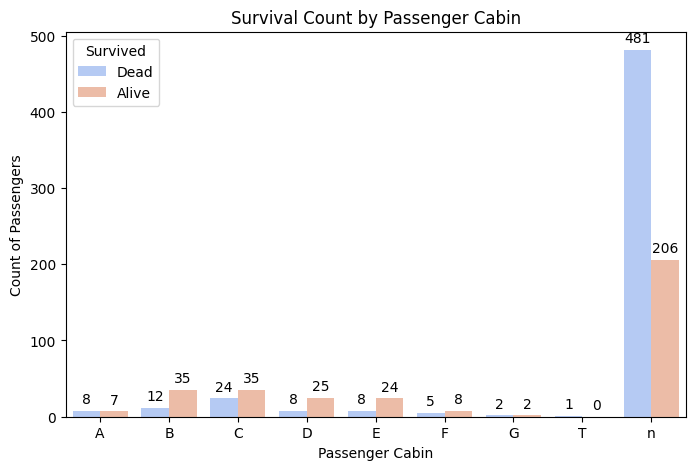

In [408]:
# Assuming Titanic_data already exists
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=Titanic_data, x="Cabin", hue="Survived", palette="coolwarm")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
# Labels and title
plt.xlabel("Passenger Cabin")
plt.ylabel("Count of Passengers")
plt.title("Survival Count by Passenger Cabin")
plt.legend(title="Survived", labels=["Dead", "Alive"])
plt.show()

From above plot you can see most of the survivors deck is not seen. In the case where passesngers deck is seen we can say B,D,E are safe decks when compared to other decks.

In [409]:
Titanic_data.groupby("Sex", observed=False)


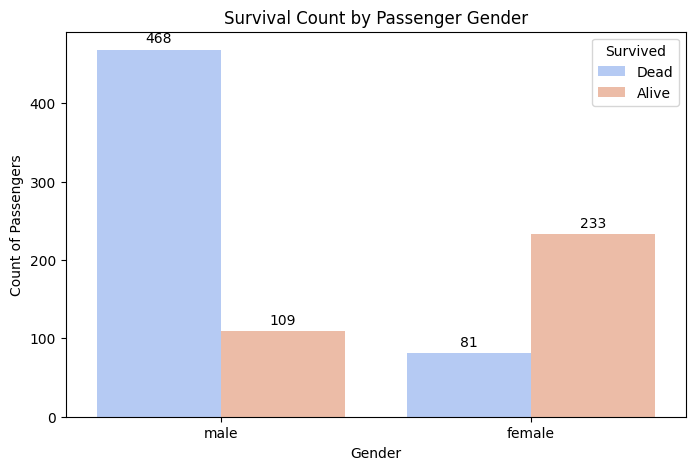

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Titanic_data already exists
plt.figure(figsize=(8, 5))
bx = sns.countplot(data=Titanic_data, x="Sex", hue="Survived", palette="coolwarm")
for container in bx.containers:
    bx.bar_label(container, fmt='%d', label_type='edge', padding=3)
# Labels and title
plt.xlabel("Gender")
plt.ylabel("Count of Passengers")
plt.title("Survival Count by Passenger Gender")
plt.legend(title="Survived", labels=["Dead", "Alive"])
plt.show()

We can see from above plot 85% of dead passengers were male. whereas 70% of the people who are alive were females.

In [411]:
Titanic_data.groupby("Age", observed = False)


In [412]:
Titanic_data["Age"].isnull().sum()

0

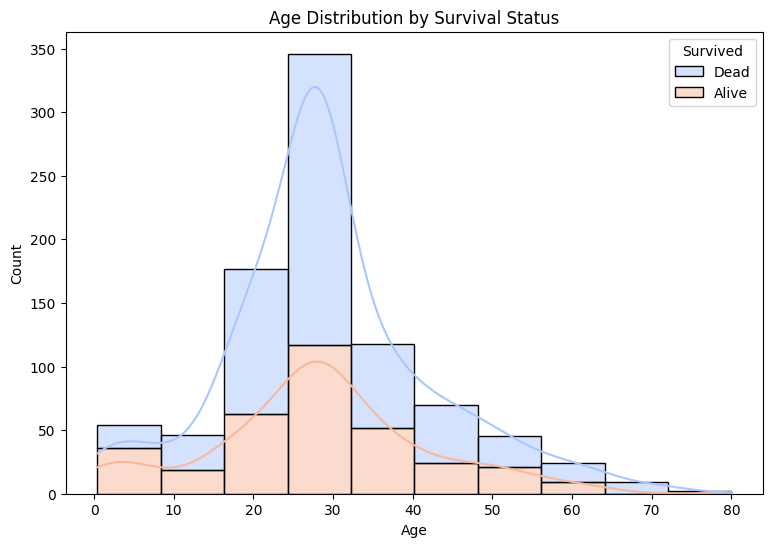

In [416]:
plt.figure(figsize=(9, 6))
sns.histplot(data=Titanic_data, x="Age", hue="Survived", bins=10, kde=True, palette="coolwarm", multiple="stack")
# Labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Survival Status")

plt.show()

From above we can see passengers between age group 25-35 registered most deaths.